In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('../data/netflix_titles.csv')

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


<Axes: >

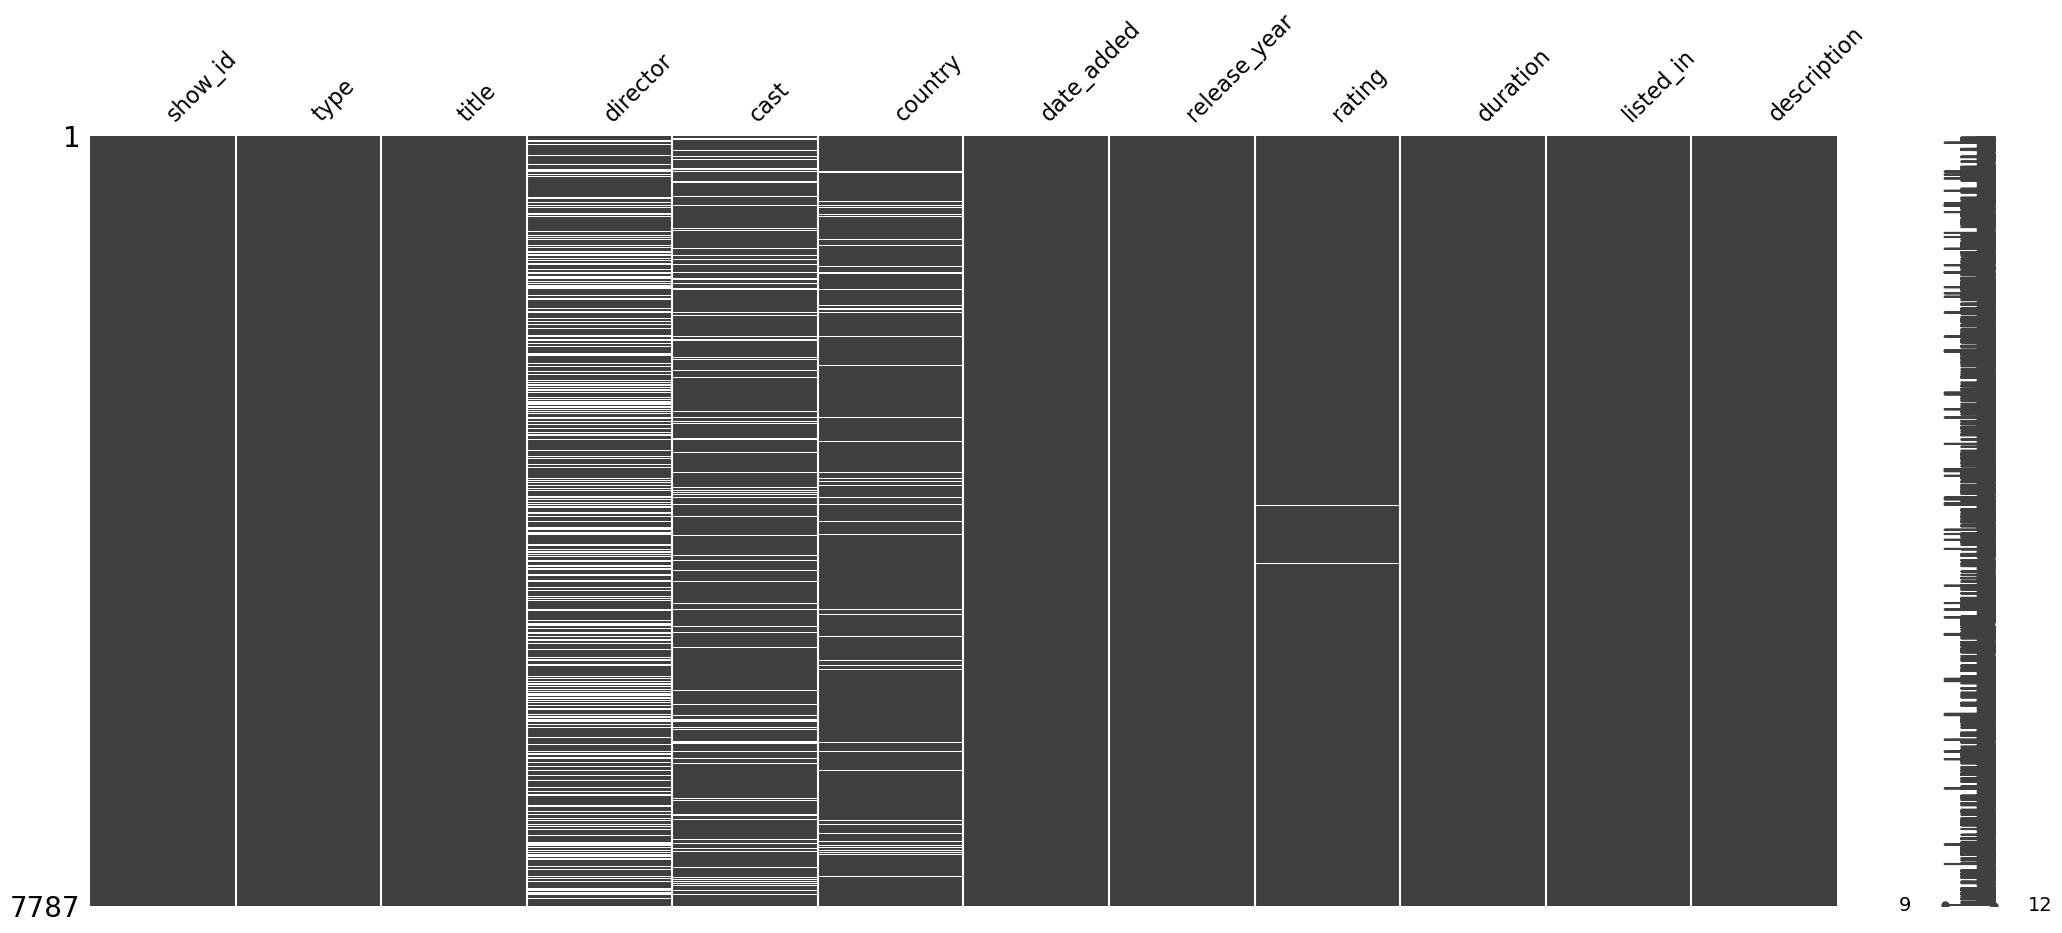

In [6]:
msno.matrix(df)

<Axes: >

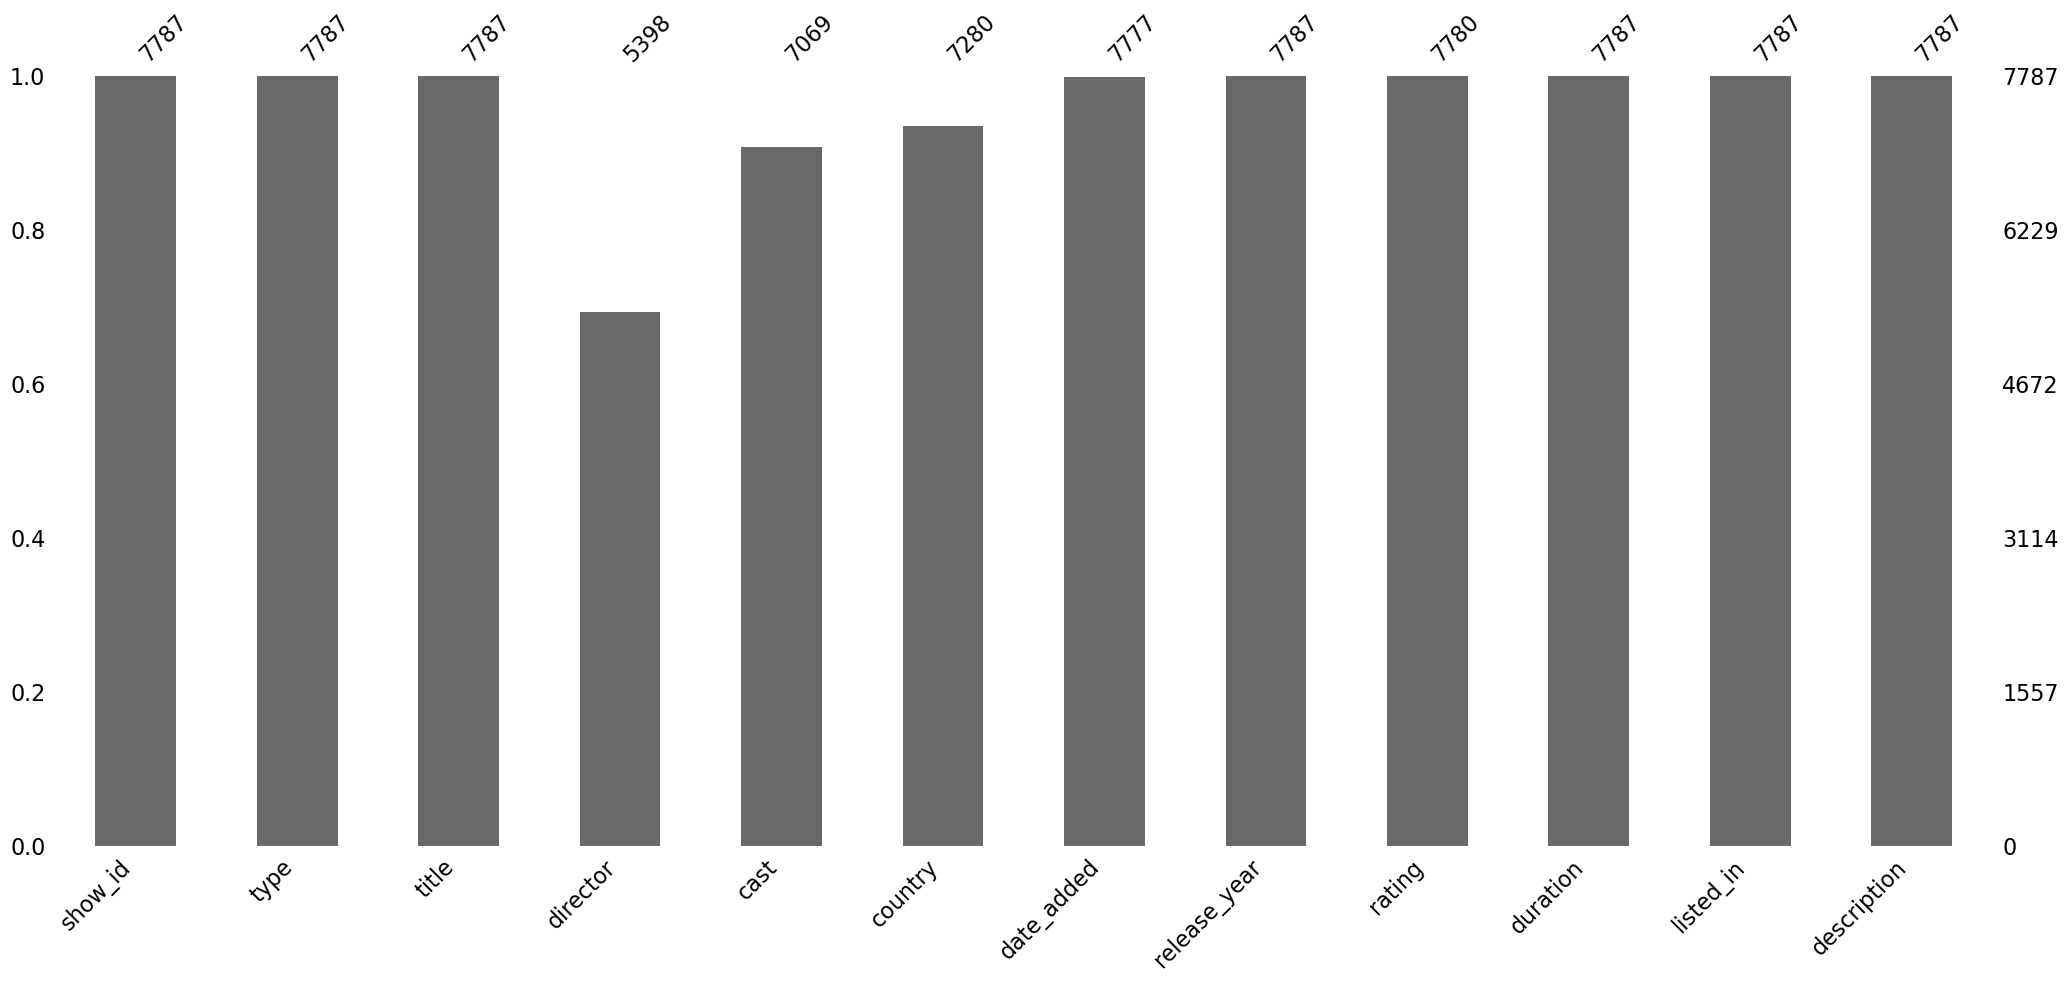

In [7]:
msno.bar(df)

In [10]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0:
        print("{}'s null rate : {}%".format(i,round(null_rate,2)))

director's null rate : 30.68%
cast's null rate : 9.22%
country's null rate : 6.51%
date_added's null rate : 0.13%
rating's null rate : 0.09%


In [11]:
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [12]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [13]:
rating_replacements ={
    67: 'TV=PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA'
}
for id, rate in rating_replacements.items():
    df.iloc[id,8] =rate
df['rating'].isna().sum()

0

In [14]:
df= df.drop(['director','cast'], axis=1
)
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
df=df[df['date_added'].notna()]

In [16]:
df.isna().sum()

show_id           0
type              0
title             0
country         506
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [17]:
df['country'] = df['country'].fillna(df['country'].mode()[0])

In [18]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1])
df['month_added'] = df['date_added'].apply(lambda x: x.split(' ')[0])
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,January


In [20]:
rating_age = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-T7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
        }
df['target_age']=df['rating'].replace(rating_age)
df['target_age'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids', 'TV=PG', 'Older kids',
       'TV-Y7-FV'], dtype=object)

In [21]:
df['type']= pd.Categorical(df['type'])

df['target_age'] = pd.Categorical(df['target_age'], categories=['Kids','Older Kids','Teens', 'Adults'])

df['year_added'] =pd.to_numeric(df['year_added'])

df.dtypes

show_id           object
type            category
title             object
country           object
date_added        object
release_year       int64
rating            object
duration          object
listed_in         object
description       object
year_added         int64
month_added       object
target_age      category
dtype: object

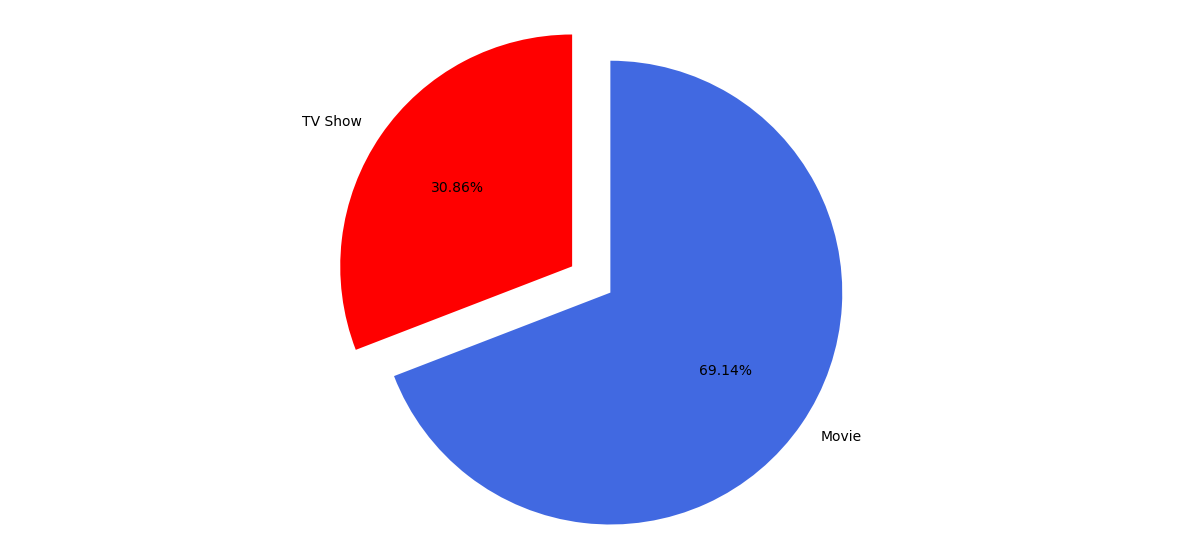

In [24]:
plt.figure(figsize=(15,7))
labels=['TV Show','Movie']
plt.pie(df['type'].value_counts().sort_values(),labels=labels,explode=[0.1,0.1], autopct='%1.2f%%', colors=['red','royalblue'],startangle= 90)
plt.axis('equal')
plt.show()

In [25]:
df_tv = df[df['type'] == 'TV Show']
df_movies = df[df['type'] == 'Movie']


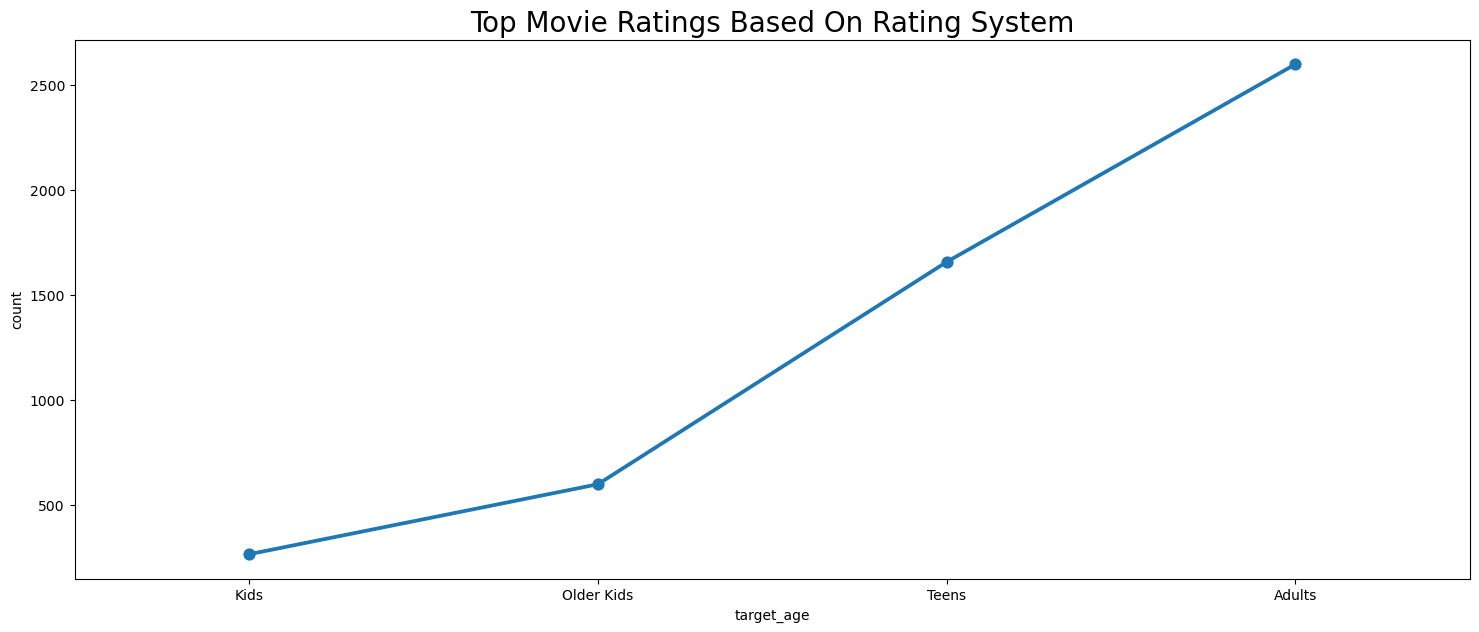

In [32]:
movie_ratings = df_movies.groupby(['target_age'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (18,7)
fig, ax = plt.subplots(figsize= fig_dims)
sns.pointplot(x='target_age', y='count', data=movie_ratings)
plt.title('Top Movie Ratings Based On Rating System', size='20')
plt.show()

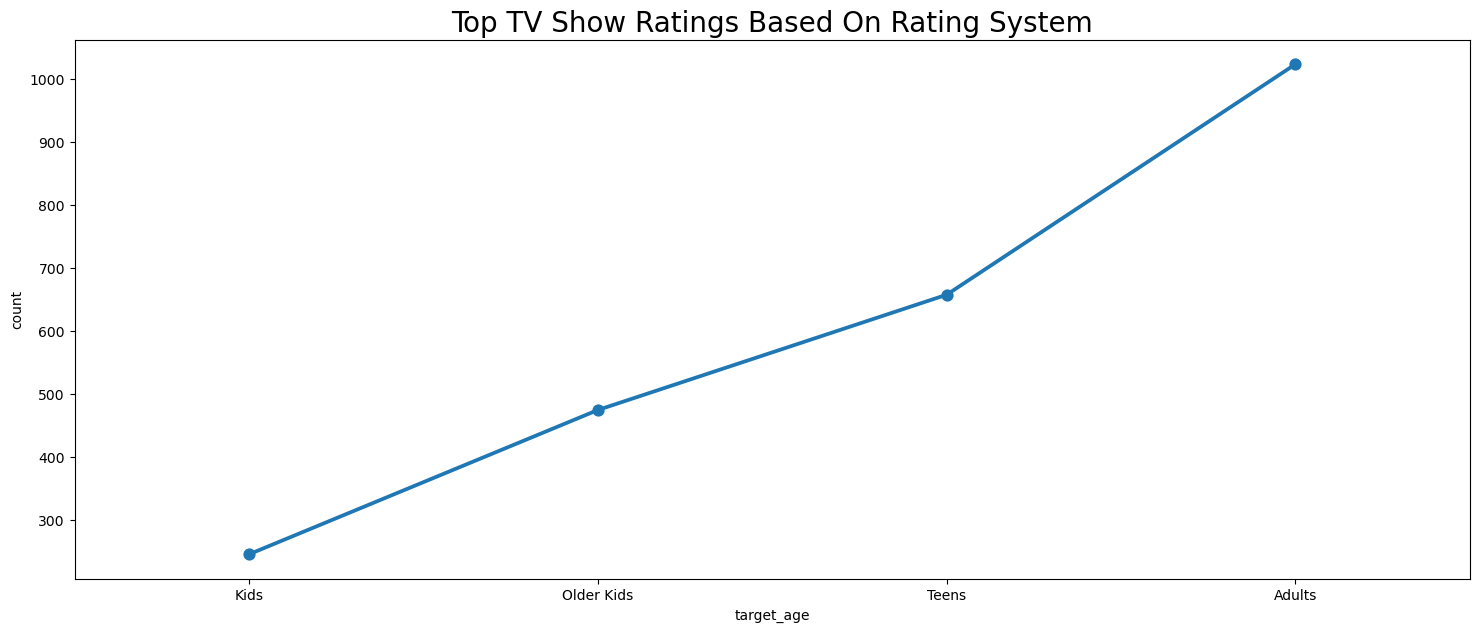

In [33]:
tv_ratings = df_tv.groupby(['target_age'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims= (18,7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='target_age', y='count', data = tv_ratings)
plt.title('Top TV Show Ratings Based On Rating System',size='20')
plt.show()

In [35]:
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_age']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_age', 'counts']
    rating_df = rating_df.sort_values('target_age')
    return rating_df
rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y= 'counts', color= 'target_age', title='Rating of Movies And TV Show Based on Target Age Groups', labels={'count': 'COUNT', 'rating': 'RATINGS', 'target_age': 'TARGET AGE GROUPS'})
fig.show()

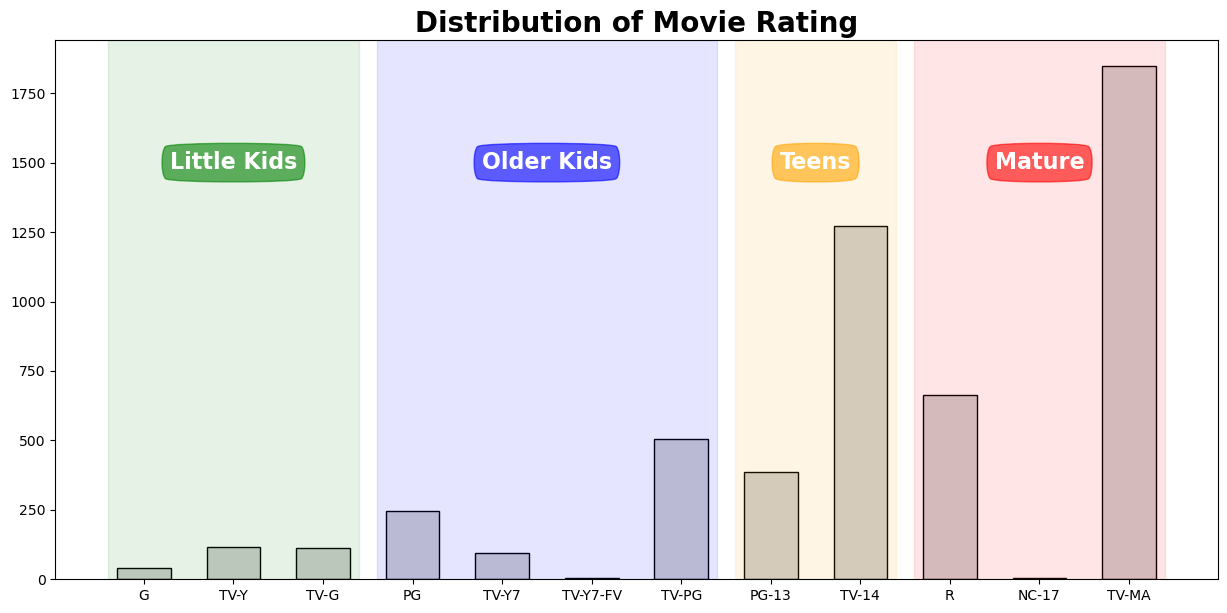

In [36]:
rating_order_movie =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
rating_order_tv =  [ 'TV-Y', 'TV-G', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'TV-14', 'R', 'TV-MA']
movie_rating = df_movies['rating'].value_counts()[rating_order_movie]
tv_rating = df_tv['rating'].value_counts()[rating_order_tv].fillna(0)
def rating_barplot(data, title, height, h_lim=None):
    fig, ax = plt.subplots(1,1, figsize=(15, 7))
    if h_lim :
        ax.set_ylim(0, h_lim)
    ax.bar(data.index, data,  color="#d0d0d0", width=0.6, edgecolor='black')

    color =  ['green',  'blue',  'orange',  'red']
    span_range = [[0, 2], [3,  6], [7, 8], [9, 11]]

    for idx, sub_title in enumerate(['Little Kids', 'Older Kids', 'Teens', 'Mature']):
        ax.annotate(sub_title,
                    xy=(sum(span_range[idx])/2 ,height),
                    xytext=(0,0), textcoords='offset points',
                    va="center", ha="center",
                    color="w", fontsize=16, fontweight='bold',
                    bbox=dict(boxstyle='round4', pad=0.4, color=color[idx], alpha=0.6))
        ax.axvspan(span_range[idx][0]-0.4,span_range[idx][1]+0.4,  color=color[idx], alpha=0.1)

    ax.set_title(f'Distribution of {title} Rating', fontsize=20, fontweight='bold', position=(0.5, 1.0+0.03))
    plt.show()

rating_barplot(movie_rating,'Movie', 1500)

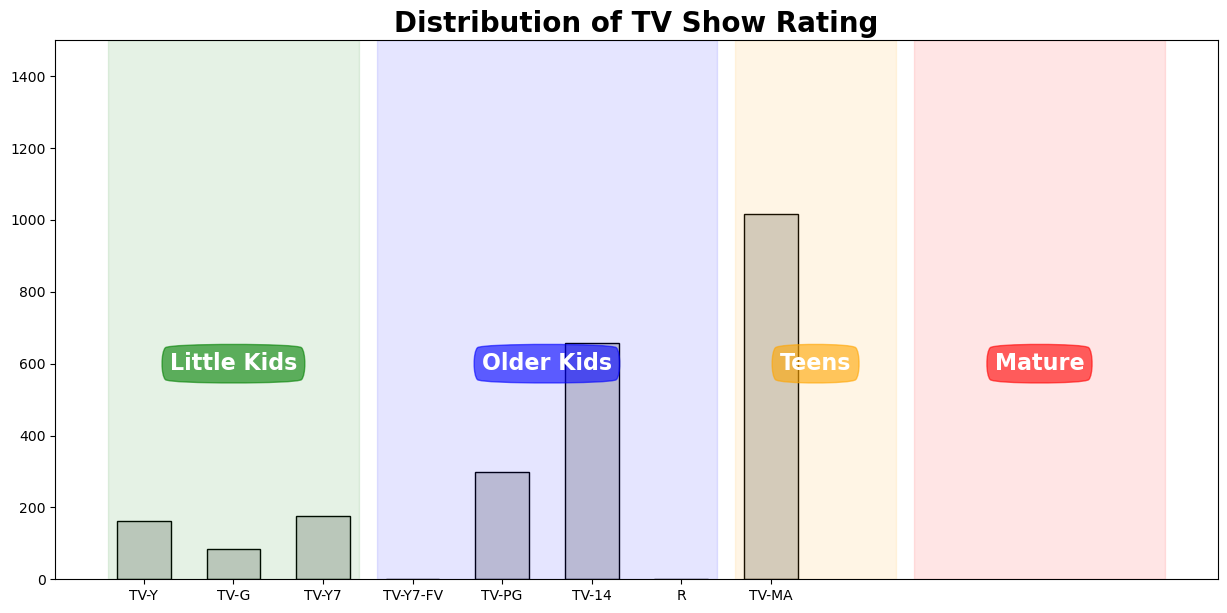

In [37]:
rating_barplot(tv_rating,'TV Show', 600,1500)

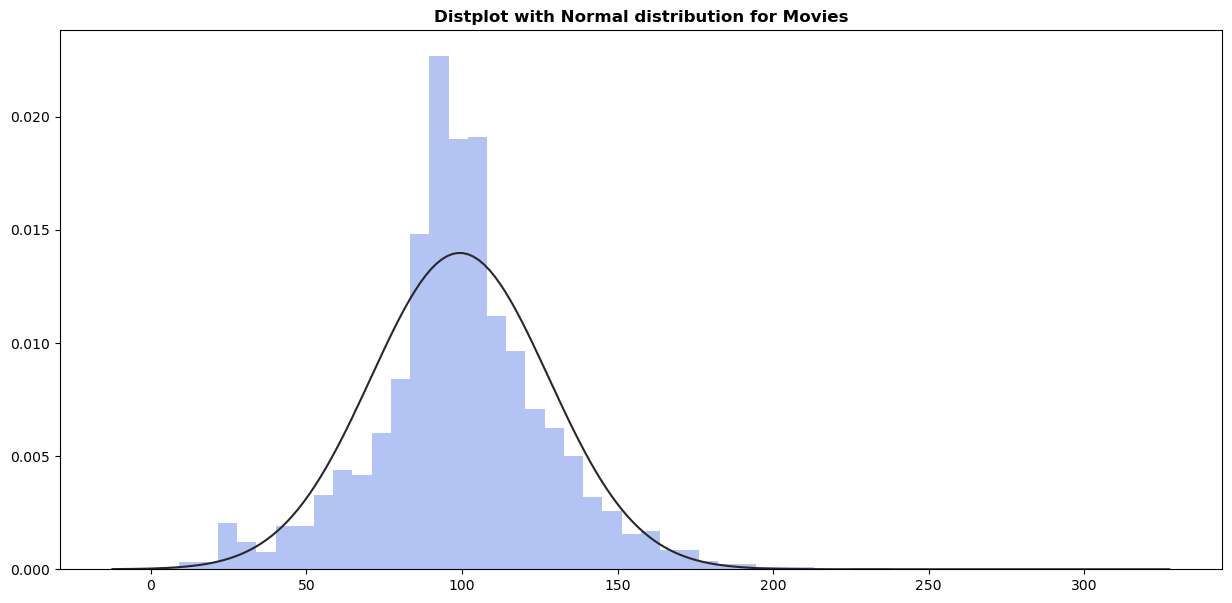

In [41]:
from scipy.stats import norm

plt.figure(figsize=(15,7))
sns.distplot(df_movies['duration'].str.extract('(\d+)'),fit=norm,kde=False, color=['royalblue'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()


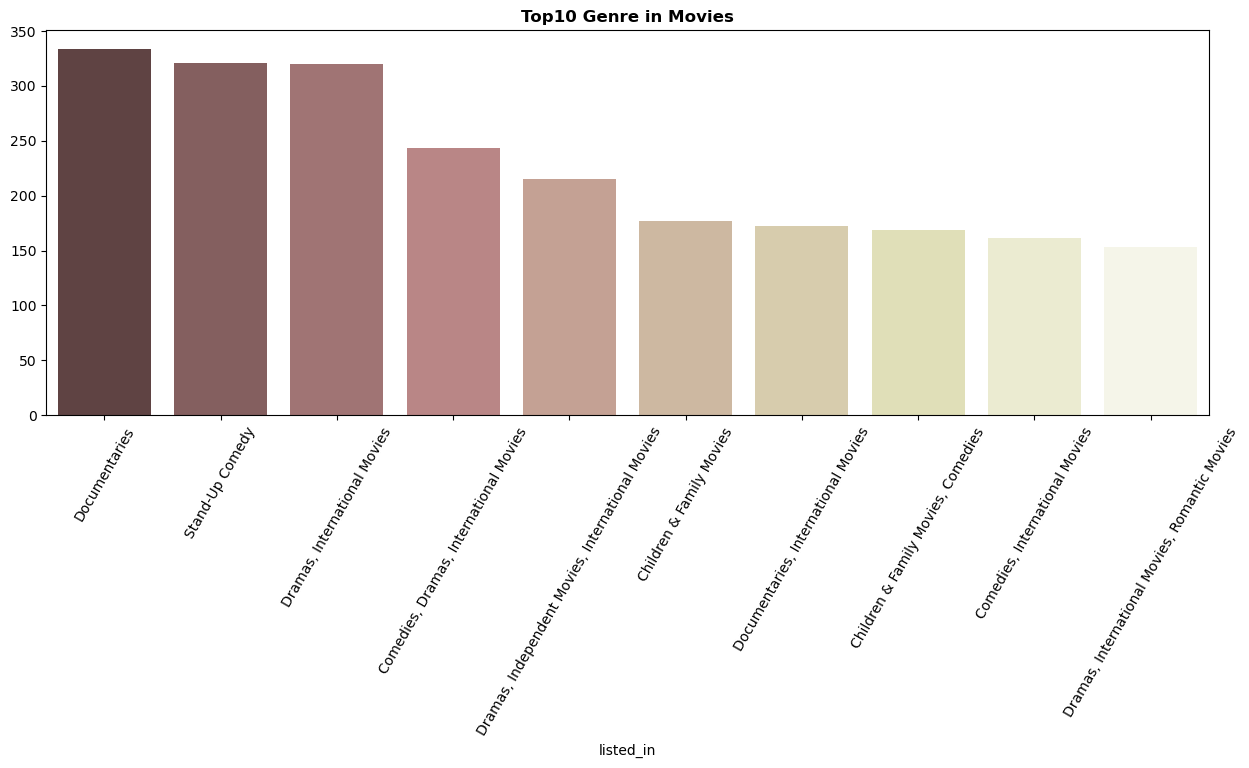

In [42]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_movies["listed_in"].value_counts().head(10).index,
            y = df_movies["listed_in"].value_counts().head(10).values,palette="pink")
plt.xticks(rotation=60)
plt.title("Top10 Genre in Movies",fontweight="bold")
plt.show()


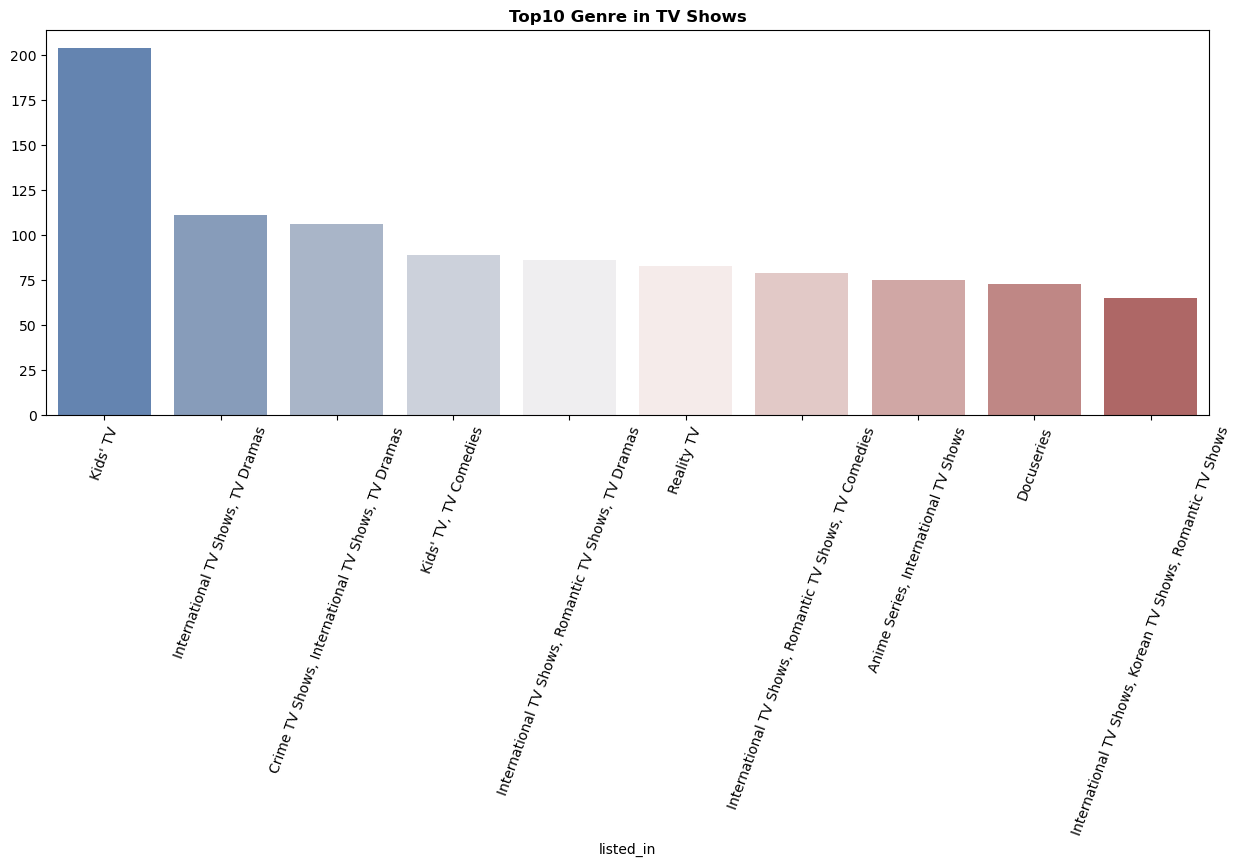

In [43]:
plt.figure(figsize=(15,5))
sns.barplot(x = df_tv["listed_in"].value_counts().head(10).index,
            y = df_tv["listed_in"].value_counts().head(10).values,palette="vlag")
plt.xticks(rotation=70)
plt.title("Top10 Genre in TV Shows",fontweight="bold")
plt.show()


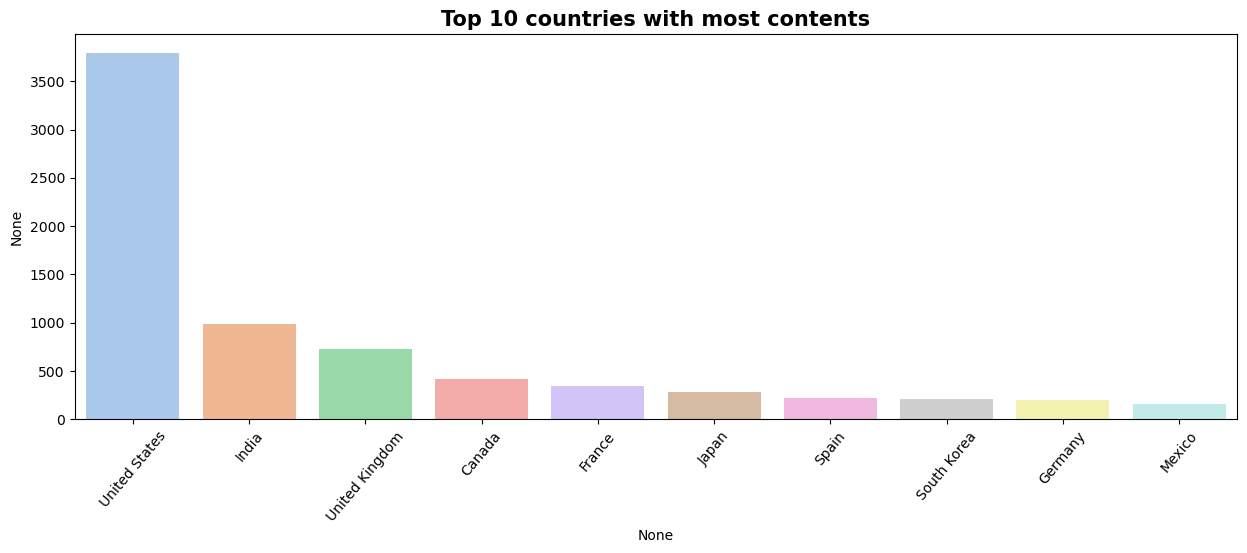

In [45]:
from collections import Counter
country_data = df['country']
country_count = pd.Series(dict(Counter(','.join(country_data).replace(' ,',',').replace(
    ', ',',').split(',')))).sort_values(ascending=False)
top20country = country_count.head(10)

plt.figure(figsize=(15,5))
sns.barplot(x= top20country.index, y=top20country, palette="pastel")
plt.xticks(rotation=50)
plt.title('Top 10 countries with most contents', fontsize=15, fontweight='bold')
plt.show()


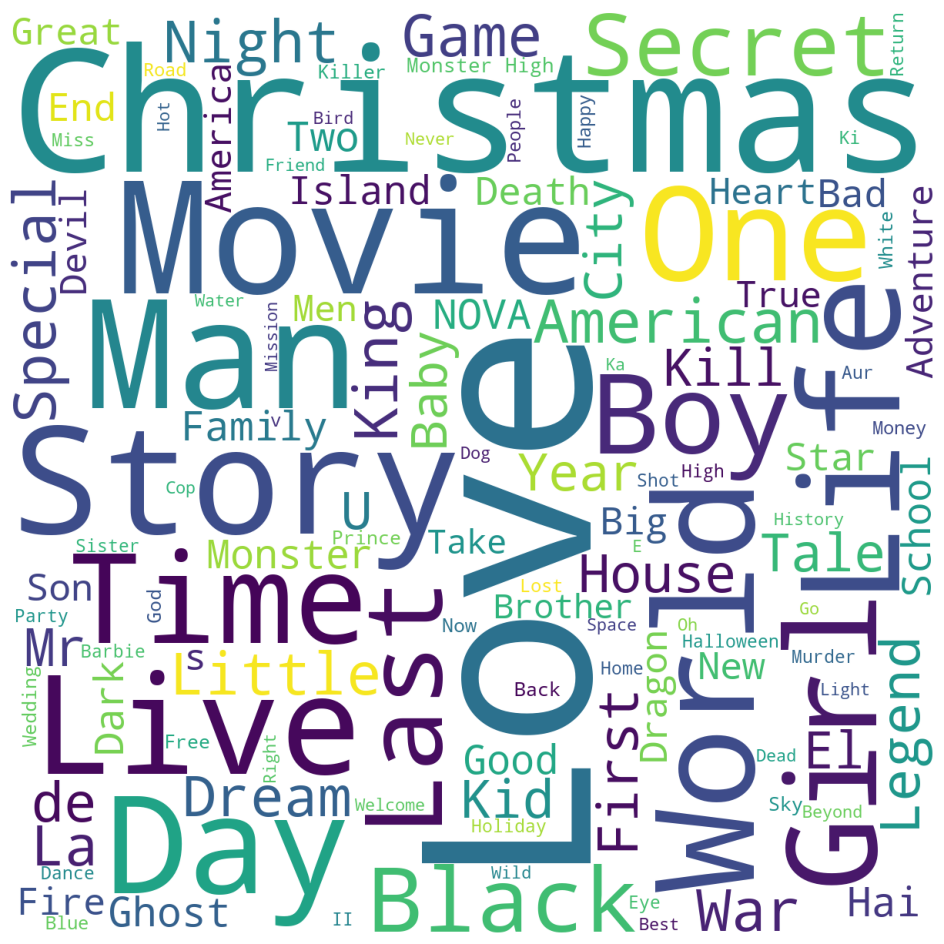

In [48]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_movies['title'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [47]:
pip install wordcloud

   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.4 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.4 kB 217.9 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/301.4 kB 476.3 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/301.4 kB 706.2 kB/s eta 0:00:01
   ------------------------------------ --- 276.5/301.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 301.4/301.4 kB 980.3 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


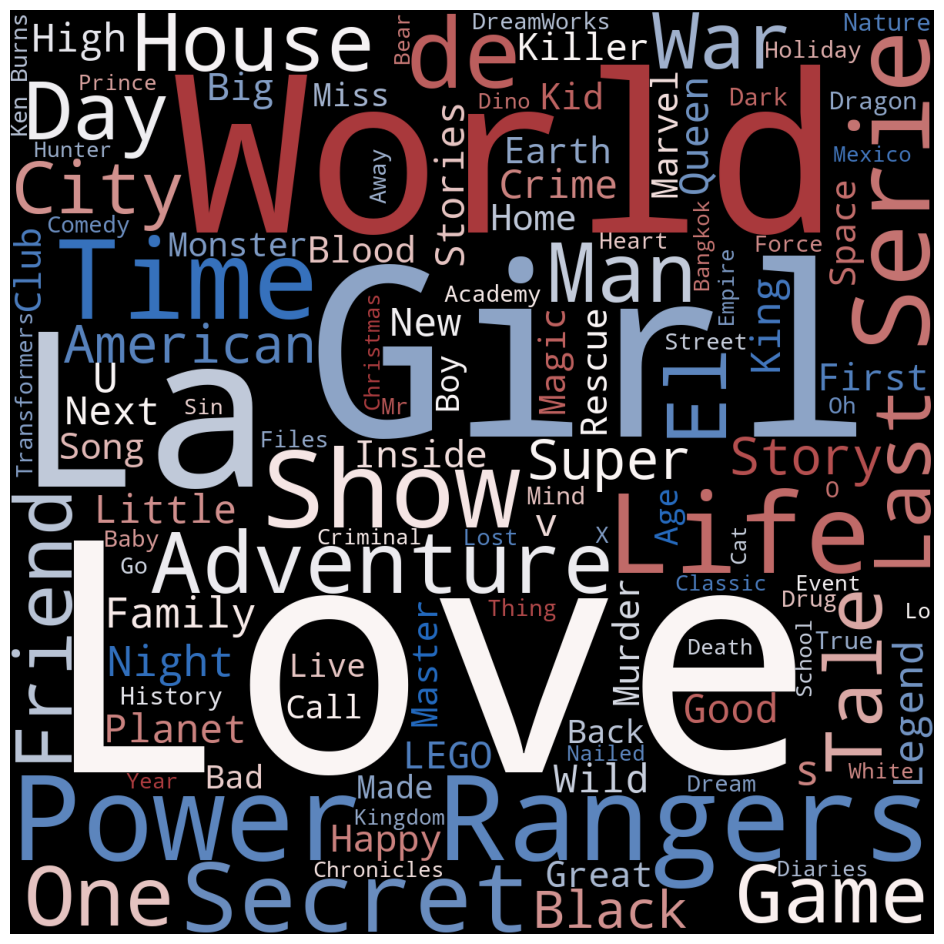

In [49]:
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(df_tv['title'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'black',colormap='vlag', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
